# Sudoku solver

Solve a sudoku grid by [modeling it](https://en.wikipedia.org/wiki/Exact_cover#Sudoku) as an [exact cover problem](https://en.wikipedia.org/wiki/Exact_cover) and solve it using [algorithm X](https://en.wikipedia.org/wiki/Knuth%27s_Algorithm_X).

It allows for fast enumeration of all possible solutions.

This is state of the arts when implementing algorithm X with [dancing links](https://en.wikipedia.org/wiki/Dancing_Links). Those are, however, kept out of scope of the present project, for the sake of simplicity. A sparse representation of the cover matrix based on dict and sets is used. Performance is satifying enough.

## Requirements

Python >= 3.7 (featuring dataclasses).  
`numpy` and `matplotlib` are the only extra dependencies.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np

In [3]:
from sudoku import plot_grid, solve_grid

## Provided grids

Grid 1


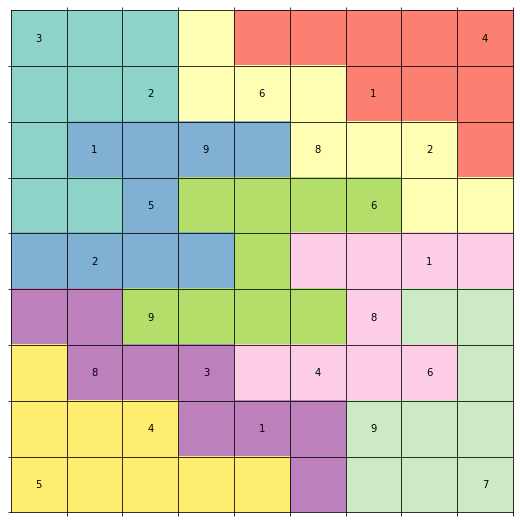

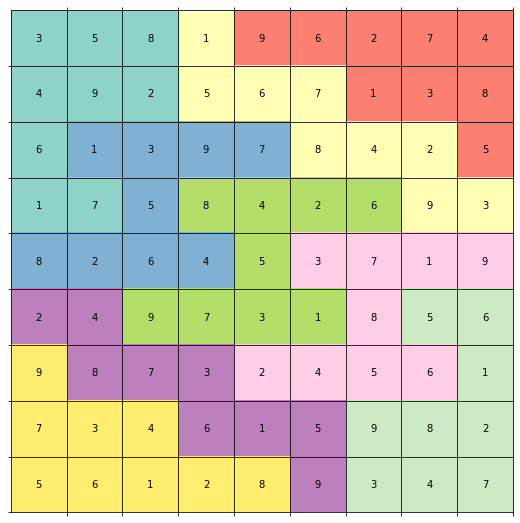


Grid 2


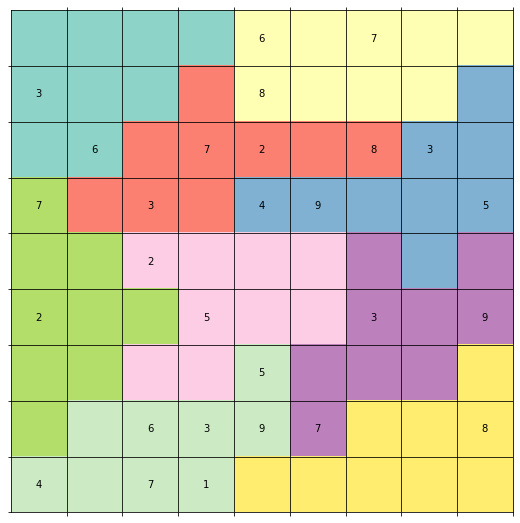

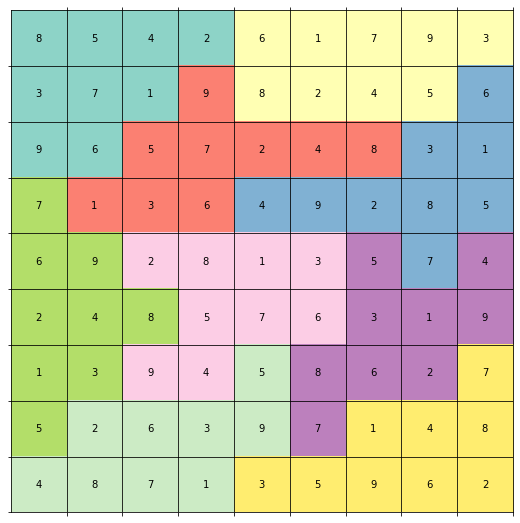


Grid 3


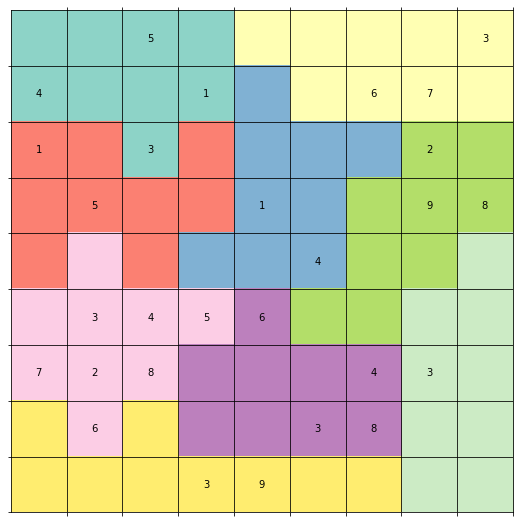

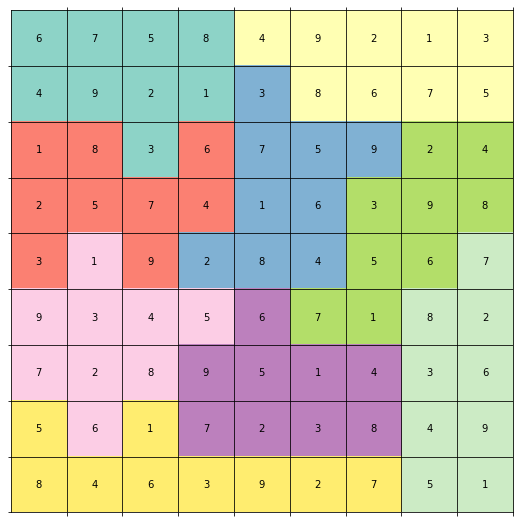


CPU times: user 4.21 s, sys: 192 ms, total: 4.41 s
Wall time: 4.46 s


In [4]:
%%time

sudoku_filepath = 'data/test_2020_04.npz'

for grid_id in range(3):
    print('Grid', grid_id + 1)

    # Load grid

    sudoku = np.load(sudoku_filepath, allow_pickle=True)['sudokus'][grid_id]

    # Extract grid

    grid = sudoku['grid']
    group_grid = sudoku['group_grid']

    # Display grid

    plot_grid(grid, group_grid)

    # Solve grid

    solution_grid = solve_grid(grid, group_grid)
    plot_grid(solution_grid, group_grid)
    
    print()

## Classical grid

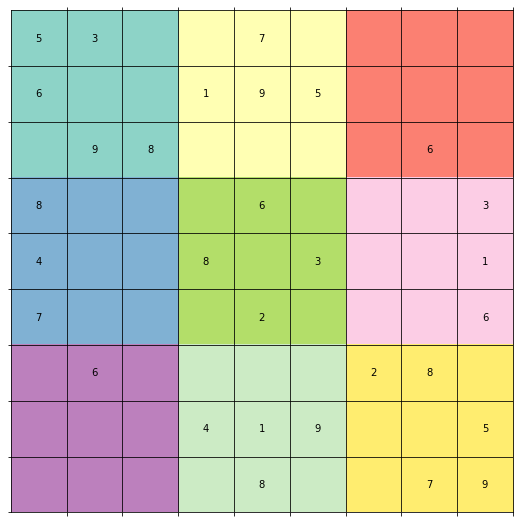

In [5]:
grid = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

group_grid = [
    [1, 1, 1, 2, 2, 2, 3, 3, 3],
    [1, 1, 1, 2, 2, 2, 3, 3, 3],
    [1, 1, 1, 2, 2, 2, 3, 3, 3],
    [4, 4, 4, 5, 5, 5, 6, 6, 6],
    [4, 4, 4, 5, 5, 5, 6, 6, 6],
    [4, 4, 4, 5, 5, 5, 6, 6, 6],
    [7, 7, 7, 8, 8, 8, 9, 9, 9],
    [7, 7, 7, 8, 8, 8, 9, 9, 9],
    [7, 7, 7, 8, 8, 8, 9, 9, 9]
]

grid = np.array(grid)
group_grid = np.array(group_grid)

plot_grid(grid, group_grid)

In [6]:
%%time
solution_grid = solve_grid(grid, group_grid)

CPU times: user 78.8 ms, sys: 0 ns, total: 78.8 ms
Wall time: 79.5 ms


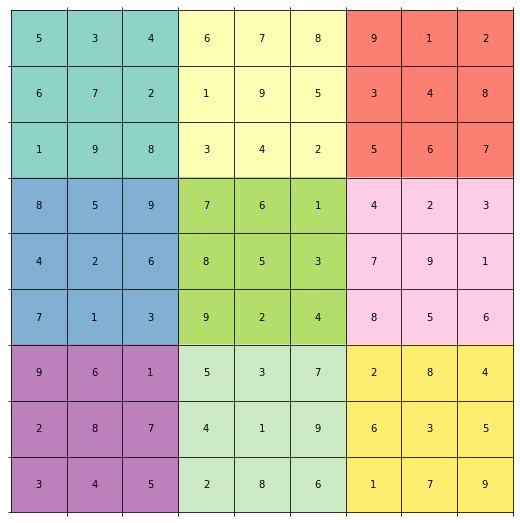

In [7]:
plot_grid(solution_grid, group_grid)

## Multi-solution grid

4x4 grid for easier reading

In [8]:
from sudoku import get_cover_matrix, solve_matrix, fill_grid

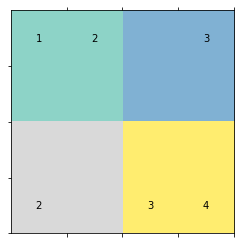

In [9]:
grid = [
    [1, 2, 0, 3],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [2, 0, 3, 4]
]

group_grid = [
    [1, 1, 2, 2],
    [1, 1, 2, 2],
    [3, 3, 4, 4],
    [3, 3, 4, 4]
]

grid = np.array(grid)
group_grid = np.array(group_grid)

plot_grid(grid, group_grid)

Solution 1


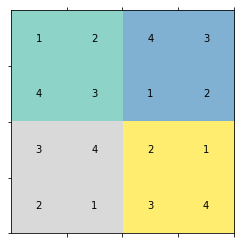

Solution 2


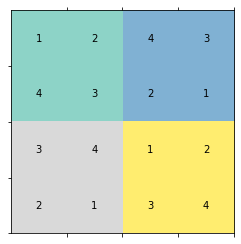

Solution 3


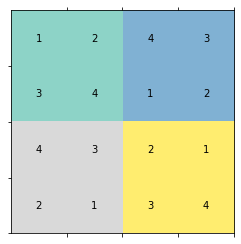

Solution 4


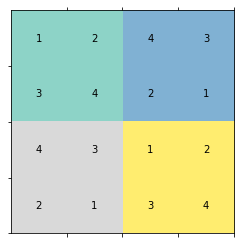

In [10]:
matrix = get_cover_matrix(grid, group_grid)
solutions = solve_matrix(matrix, [])

for i, solution in enumerate(solutions, 1):
    print('Solution', i)
    solution_grid = fill_grid(grid, solution)
    plot_grid(solution_grid, group_grid)

## Large grid

Sorry for the ugly colormap.

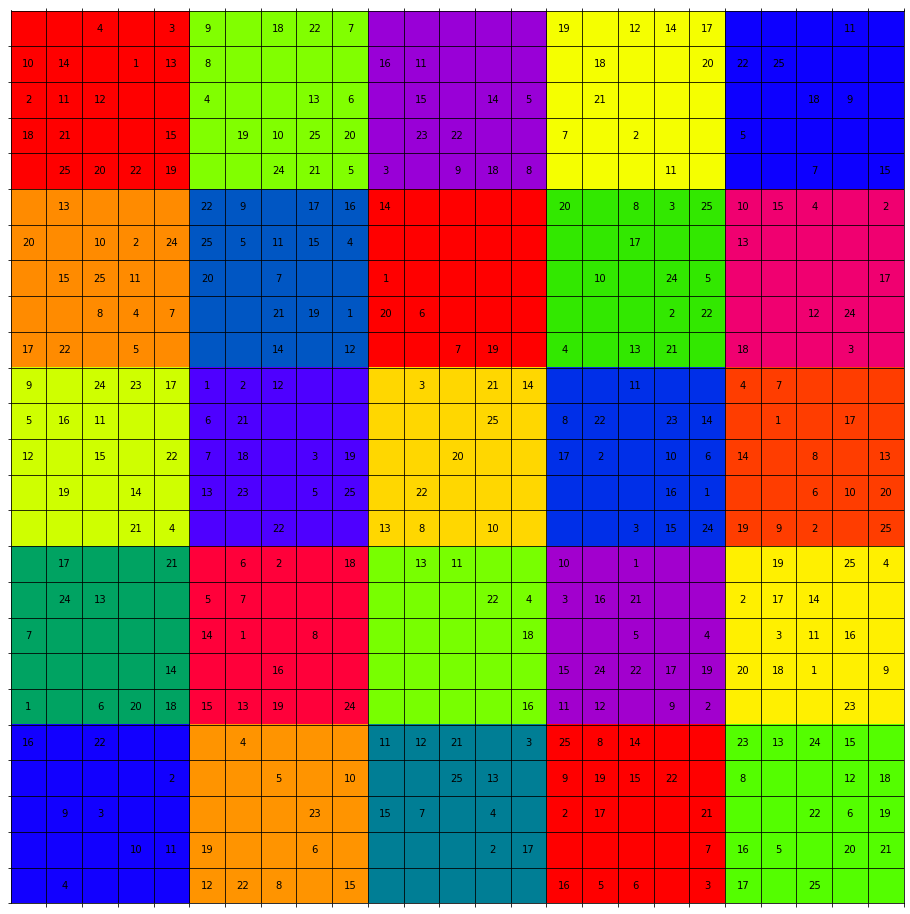

In [11]:
grid = [
    [0, 0, 4, 0, 3, 9, 0, 18, 22, 7, 0, 0, 0, 0, 0, 19, 0, 12, 14, 17, 0, 0, 0, 11, 0],
    [10, 14, 0, 1, 13, 8, 0, 0, 0, 0, 16, 11, 0, 0, 0, 0, 18, 0, 0, 20, 22, 25, 0, 0, 0],
    [2, 11, 12, 0, 0, 4, 0, 0, 13, 6, 0, 15, 0, 14, 5, 0, 21, 0, 0, 0, 0, 0, 18, 9, 0],
    [18, 21, 0, 0, 15, 0, 19, 10, 25, 20, 0, 23, 22, 0, 0, 7, 0, 2, 0, 0, 5, 0, 0, 0, 0],
    [0, 25, 20, 22, 19, 0, 0, 24, 21, 5, 3, 0, 9, 18, 8, 0, 0, 0, 11, 0, 0, 0, 7, 0, 15],
    [0, 13, 0, 0, 0, 22, 9, 0, 17, 16, 14, 0, 0, 0, 0, 20, 0, 8, 3, 25, 10, 15, 4, 0, 2],
    [20, 0, 10, 2, 24, 25, 5, 11, 15, 4, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 13, 0, 0, 0, 0],
    [0, 15, 25, 11, 0, 20, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 10, 0, 24, 5, 0, 0, 0, 0, 17],
    [0, 0, 8, 4, 7, 0, 0, 21, 19, 1, 20, 6, 0, 0, 0, 0, 0, 0, 2, 22, 0, 0, 12, 24, 0],
    [17, 22, 0, 5, 0, 0, 0, 14, 0, 12, 0, 0, 7, 19, 0, 4, 0, 13, 21, 0, 18, 0, 0, 3, 0],
    [9, 0, 24, 23, 17, 1, 2, 12, 0, 0, 0, 3, 0, 21, 14, 0, 0, 11, 0, 0, 4, 7, 0, 0, 0],
    [5, 16, 11, 0, 0, 6, 21, 0, 0, 0, 0, 0, 0, 25, 0, 8, 22, 0, 23, 14, 0, 1, 0, 17, 0],
    [12, 0, 15, 0, 22, 7, 18, 0, 3, 19, 0, 0, 20, 0, 0, 17, 2, 0, 10, 6, 14, 0, 8, 0, 13],
    [0, 19, 0, 14, 0, 13, 23, 0, 5, 25, 0, 22, 0, 0, 0, 0, 0, 0, 16, 1, 0, 0, 6, 10, 20],
    [0, 0, 0, 21, 4, 0, 0, 22, 0, 0, 13, 8, 0, 10, 0, 0, 0, 3, 15, 24, 19, 9, 2, 0, 25],
    [0, 17, 0, 0, 21, 0, 6, 2, 0, 18, 0, 13, 11, 0, 0, 10, 0, 1, 0, 0, 0, 19, 0, 25, 4],
    [0, 24, 13, 0, 0, 5, 7, 0, 0, 0, 0, 0, 0, 22, 4, 3, 16, 21, 0, 0, 2, 17, 14, 0, 0],
    [7, 0, 0, 0, 0, 14, 1, 0, 8, 0, 0, 0, 0, 0, 18, 0, 0, 5, 0, 4, 0, 3, 11, 16, 0],
    [0, 0, 0, 0, 14, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 15, 24, 22, 17, 19, 20, 18, 1, 0, 9],
    [1, 0, 6, 20, 18, 15, 13, 19, 0, 24, 0, 0, 0, 0, 16, 11, 12, 0, 9, 2, 0, 0, 0, 23, 0],
    [16, 0, 22, 0, 0, 0, 4, 0, 0, 0, 11, 12, 21, 0, 3, 25, 8, 14, 0, 0, 23, 13, 24, 15, 0],
    [0, 0, 0, 0, 2, 0, 0, 5, 0, 10, 0, 0, 25, 13, 0, 9, 19, 15, 22, 0, 8, 0, 0, 12, 18],
    [0, 9, 3, 0, 0, 0, 0, 0, 23, 0, 15, 7, 0, 4, 0, 2, 17, 0, 0, 21, 0, 0, 22, 6, 19],
    [0, 0, 0, 10, 11, 19, 0, 0, 6, 0, 0, 0, 0, 2, 17, 0, 0, 0, 0, 7, 16, 5, 0, 20, 21],
    [0, 4, 0, 0, 0, 12, 22, 8, 0, 15, 0, 0, 0, 0, 0, 16, 5, 6, 0, 3, 17, 0, 25, 0, 0]
]

group_grid = [[5 * (r // 5) + c // 5 + 1 for c in range(25)] for r in range(25)]

grid = np.array(grid)
group_grid = np.array(group_grid)

plot_grid(grid, group_grid, colormap='prism')

In [12]:
%%time
solution_grid = solve_grid(grid, group_grid)

CPU times: user 6.45 s, sys: 60.1 ms, total: 6.51 s
Wall time: 6.54 s


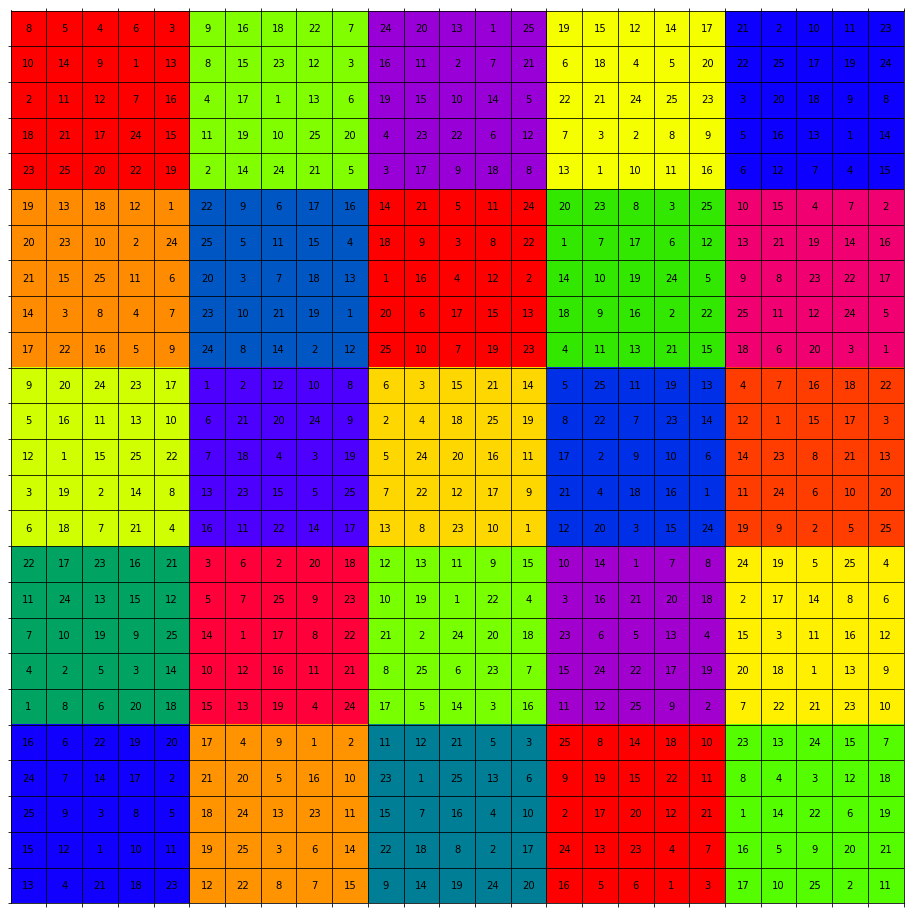

In [13]:
plot_grid(solution_grid, group_grid, colormap='prism')